# Plot

In [ ]:
!pip install plotnine pandas -q

In [12]:
import pandas as pd,os
import plotnine as p9
from os import listdir
from os.path import join
import csv
import matplotlib.pyplot as plt
import ast
import re
import altair as alt
import askcomm

# better viewing of tweet text
pd.set_option('display.max_colwidth', 150)
import warnings
warnings.filterwarnings('ignore')
p9.options.figure_size=(11,8)

## Load data

In [13]:
df_all = pd.read_csv(
    '../synthesis/data.jobcensus.rc.synthesized.2020-12-2.csv'
)
# df_all = df_all[df_all.JobYear > 2010] #Filter out 2010
df_all[:2]

,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm
0,"Abilene Christian University (Abilene, TX)",2011,http://www.acu.edu/academics/provost/positions.html#cas | http://www.acu.edu/academics/provost/documents/Faculty_Application1.pdf,TT,Rhetoric/Composition,Wiki,http://www.acu.edu/academics/provost/positions.html#cas | http://www.acu.edu/academics/provost/documents/Faculty_Application1.pdf
1,Alfred State College (NY),2011,http://www.higheredjobs.com/faculty/details.cfm?JobCode=175465551,TT,Rhetoric/Composition,Wiki,http://www.higheredjobs.com/faculty/details.cfm?JobCode=175465551


In [14]:
len(df_all)

4468

## Create DateTime Year Column

In [15]:
df_all['Year'] = pd.to_datetime(df_all['JobYear'], format="%Y") 
df_all['Year'] = pd.DatetimeIndex(df_all['Year']).year
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   JobTitle      4468 non-null   object
 1   JobYear       4468 non-null   int64 
 2   JobLink       4038 non-null   object
 3   JobType       4468 non-null   object
 4   JobField      4468 non-null   object
 5   JobSource     4468 non-null   object
 6   JobLink_norm  4038 non-null   object
 7   Year          4468 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 279.4+ KB


## Import Field Alias Data

In [16]:
df_alias = pd.read_csv('../synthesis/data.jobcensus.rc.field_aliases.csv')
df_alias.sample(5)

,JobField,FieldAlias,Count
40,TESOL/Applied Linguistics,TESOL/Applied Linguistics,35
7,Archaeology,Archaeology,24
17,English Literature,English Literature,1
4,American Studies,American Studies,65
14,Creative Writing,Creative Writing,179


## Merge Fields with Corpus

In [17]:
df=df_all.merge(df_alias,on='JobField',how='inner')
df[df.JobField=='Community Colleges']

,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,Year,FieldAlias,Count
3696,Aims Community College (CO) - Full-Time English / Humanities Instructor,2014,http://www.higheredjobs.com/faculty/details.cfm?JobCode=175861805&Title=English%2FHumanities%20Instructor,TT,Community Colleges,Wiki,http://www.higheredjobs.com/faculty/details.cfm?JobCode=175861805&Title=English%2FHumanities%20Instructor,2014,Community Colleges,353
3697,American River College (CA) - TT Asst. Professor of English (Writing),2014,https://chroniclevitae.com/jobs/0000817869-01#sthash.s4JbEajH.dpuf,TT,Community Colleges,Wiki,https://chroniclevitae.com/jobs/0000817869-01#sthash.s4JbEajH.dpuf,2014,Community Colleges,353
3698,Arizona Western College - Professor of English (Fall 2014),2014,mailto:human.resources@azwestern.edu | https://chroniclevitae.com/jobs/0000828212-01#sthash.BzQOVy2W.dpuf,TT,Community Colleges,Wiki,mailto:human.resources@azwestern.edu | https://chroniclevitae.com/jobs/0000828212-01#sthash.BzQOVy2W.dpuf,2014,Community Colleges,353
3699,Baltimore City Community College (MD) - Asst. Professor of English,2014,mailto:careers@bccc.edu | http://www.bccc.edu/cms/lib05/MD11000285/Centricity/Domain/64/Assistant%20Professor%20Englishb.pdf | http://www.highered...,TT,Community Colleges,Wiki,mailto:careers@bccc.edu | http://www.bccc.edu/cms/lib05/MD11000285/Centricity/Domain/64/Assistant%20Professor%20Englishb.pdf | http://www.highered...,2014,Community Colleges,353
3700,Bellevue College (WA) - Full-time Tenure Track Faculty in English (2 Positions) - PRELIMINARY INTERVIEW SCHEDULED,2014,http://www.bellevuecollege.edu/jobs | https://chroniclevitae.com/jobs/0000819336-01,TT,Community Colleges,Wiki,http://www.bellevuecollege.edu/jobs | https://chroniclevitae.com/jobs/0000819336-01,2014,Community Colleges,353
...,...,...,...,...,...,...,...,...,...,...
4043,South Puget Sound Community College (WA) - TT English Faculty (2 Positions),2018,https://www.higheredjobs.com/faculty/details.cfm?JobCode=176628082&Title=English%20Professor,TT,Community Colleges,Wiki,https://www.higheredjobs.com/faculty/details.cfm?JobCode=176628082&Title=English%20Professor,2018,Community Colleges,353
4044,Truckee Meadows Community College (NV) - TT English Instructor (2 Positions),2018,https://nshe.wd1.myworkdayjobs.com/en-US/TMCC-External/job/TMCC---Truckee-Meadows-Community-College---Dandini-Campus/Tenure-Track-English-Instruct...,TT,Community Colleges,Wiki,https://nshe.wd1.myworkdayjobs.com/en-US/TMCC-External/job/TMCC---Truckee-Meadows-Community-College---Dandini-Campus/Tenure-Track-English-Instruct...,2018,Community Colleges,353
4045,Valencia College (FL) - Professor of English (incl. TT - multiple positions),2018,http://valenciacollege.edu/faculty/forms/credentials/ | https://valenciacollege.csod.com/ats/careersite/JobDetails.aspx?id=5321&source=highered | ...,TT,Community Colleges,Wiki,http://valenciacollege.edu/faculty/forms/credentials/ | https://valenciacollege.csod.com/ats/careersite/JobDetails.aspx?id=5321&source=highered | ...,2018,Community Colleges,353
4046,"Hostos Community College, CUNY (NY) - TT Asst. Professor - English (Multiple Positions)",2019,https://cuny.jobs/bronx-ny/assistant-professor-english/C5B83F6F720449539264CEE2DA789C39/job/,TT,Community Colleges,Wiki,https://cuny.jobs/bronx-ny/assistant-professor-english/C5B83F6F720449539264CEE2DA789C39/job/,2019,Community Colleges,353


In [18]:
df['JobYear'] = df['JobYear'].apply(int)
df.sample(5)

,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,Year,FieldAlias,Count
1380,Harvard College Writing Program (MA) - Preceptor in Expository Writing - INTERVIEW STAGE,2015,https://academicpositions.harvard.edu/postings/5872 | https://academicpositions.harvard.edu/postings/5872 | https://academicpositions.harvard.edu/...,TT,Rhetoric/Composition,Wiki,https://academicpositions.harvard.edu/postings/5872 | https://academicpositions.harvard.edu/postings/5872 | https://academicpositions.harvard.edu/...,2015,Rhetoric/Composition,2443
494,"University of South Florida Polytechnic - Assistant Professor,Technical and Professional Writing - CAMPUS VISITS SCHEDULED",2012,http://www.higheredjobs.com/faculty/details.cfm?JobCode=175561453&Title=Assistant%20Professor%2C%20Technical%20and%20Professional%20Writing | http...,TT,Rhetoric/Composition,Wiki,http://www.higheredjobs.com/faculty/details.cfm?JobCode=175561453&Title=Assistant%20Professor%2C%20Technical%20and%20Professional%20Writing | http...,2012,Rhetoric/Composition,2443
3743,Glendale Community College (CA) - TT English Instructor (2 Positions),2014,http://www.glendale.edu/employment | https://chroniclevitae.com/jobs/0000825799-01#sthash.CLOGPQIN.dpuf,TT,Community Colleges,Wiki,http://www.glendale.edu/employment | https://chroniclevitae.com/jobs/0000825799-01#sthash.CLOGPQIN.dpuf,2014,Community Colleges,353
1800,"University of California San Diego (CA) - Marshall College, Dimensions of Culture Writing Program Director - Lecturer with Potential Security of E...",2017,http://marshall.ucsd.edu/doc/index.html | http://apptrkr.com/887419 | http://facultyexcellence.ucsd.edu/c2d/ | https://www.h-net.org/jobs/job_disp...,Non-TT,Rhetoric/Composition,Wiki,http://marshall.ucsd.edu/doc/index.html | http://apptrkr.com/887419 | http://facultyexcellence.ucsd.edu/c2d/ | https://www.h-net.org/jobs/job_disp...,2017,Rhetoric/Composition,2443
1850,Wagner College (NY) - TT Assistant Professor of English and Director of the Writing Center - MLA INTERVIEW STAGE,2017,https://careers.insidehighered.com/job/1270235/assistant-professor-of-english-director-of-the-writing-center/?TrackID=11#sc=rss&me=feed&cm=general,TT,Rhetoric/Composition,Wiki,https://careers.insidehighered.com/job/1270235/assistant-professor-of-english-director-of-the-writing-center/?TrackID=11#sc=rss&me=feed&cm=general,2017,Rhetoric/Composition,2443


In [19]:
# filter
dfm = df
dfm = dfm[dfm.FieldAlias!='--']
dfm.sample(5)

,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,Year,FieldAlias,Count
3723,"College of Marin (CA) - English Skills Instructor (Reading and/or Composition) - Full-time, Tenure-track",2014,http://apptrkr.com/428745 | http://www.higheredjobs.com/faculty/details.cfm?JobCode=175847627&Title=English%20Skills%20Instructor%20%28Reading%20a...,TT,Community Colleges,Wiki,http://apptrkr.com/428745 | http://www.higheredjobs.com/faculty/details.cfm?JobCode=175847627&Title=English%20Skills%20Instructor%20%28Reading%20a...,2014,Community Colleges,353
2743,University of New Haven (CT) - TT Asst. Professor (First Year Writing Coordinator),2014,https://apply.interfolio.com/24192,TT,Generalist,Wiki,https://apply.interfolio.com/24192,2014,Generalist,816
398,Siena Heights University - Assistant Professor of English in Communications,2012,mailto:shujobs@sienaheights.edu | http://www.higheredjobs.com/faculty/details.cfm?JobCode=175579459&Title=Assistant%20Professor%20of%20English%20%...,TT,Rhetoric/Composition,Wiki,mailto:shujobs@sienaheights.edu | http://www.higheredjobs.com/faculty/details.cfm?JobCode=175579459&Title=Assistant%20Professor%20of%20English%20%...,2012,Rhetoric/Composition,2443
2065,University of Utah (UT) - Professor and Chair - Dept of Writing and Rhetoric - CAMPUS INTERVIEW STAGE,2018,http://writing.utah.edu/ | https://utah.peopleadmin.com/postings/68883,TT,Rhetoric/Composition,Wiki,http://writing.utah.edu/ | https://utah.peopleadmin.com/postings/68883,2018,Rhetoric/Composition,2443
2520,Delaware State University - TT Asst. Professor of English,2012,http://www.desu.edu/ | http://www.higheredjobs.com/myHigherEdJobs/Apply/chooseNextStep.cfm?JobCode=175605438 | http://tbe.taleo.net/NA12/ats/caree...,TT,Generalist,Wiki,http://www.desu.edu/ | http://www.higheredjobs.com/myHigherEdJobs/Apply/chooseNextStep.cfm?JobCode=175605438 | http://tbe.taleo.net/NA12/ats/caree...,2012,Generalist,816


## Plot 0: All jobs

In [20]:
df_count0 = dfm[dfm.JobType!='Postdoc'].groupby(['Year']).count().reset_index()
df_count0

,Year,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,FieldAlias,Count
0,2011,315,315,265,315,315,315,265,315,315
1,2012,445,445,422,445,445,445,422,445,445
2,2013,422,422,361,422,422,422,361,422,422
3,2014,603,603,553,603,603,603,553,603,603
4,2015,655,655,641,655,655,655,641,655,655
5,2016,416,416,393,416,416,416,393,416,416
6,2017,382,382,371,382,382,382,371,382,382
7,2018,391,391,364,391,391,391,364,391,391
8,2019,281,281,264,281,281,281,264,281,281
9,2020,143,143,119,143,143,143,119,143,143


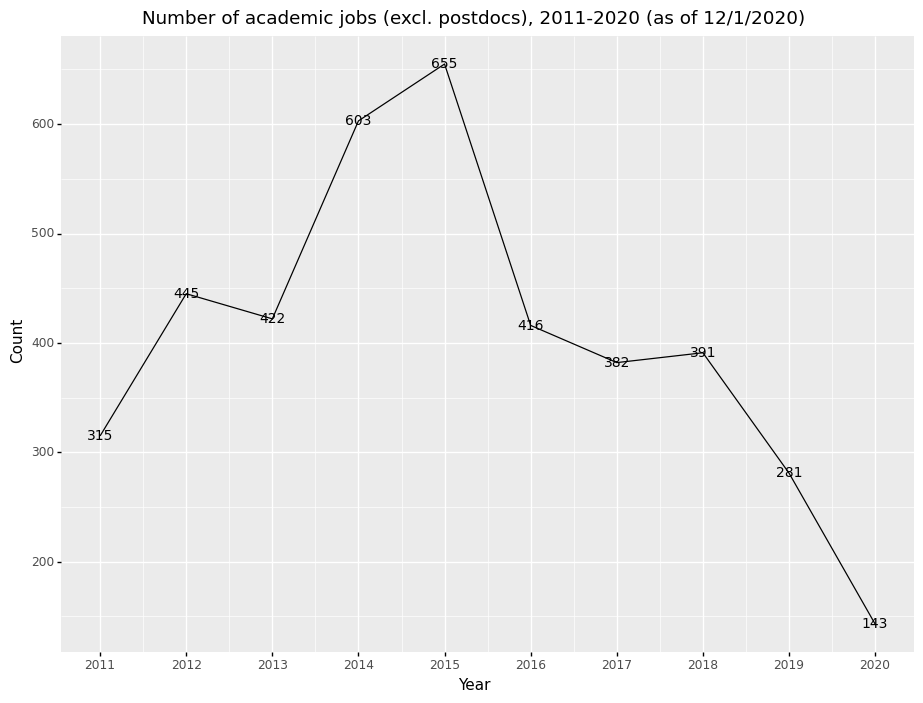

<ggplot: (-9223372036536264928)>

In [21]:
fig=(
    p9.ggplot(p9.aes(x='Year',y='Count'),df_count0) 
    + p9.geom_line()
    + p9.geom_text(p9.aes(label='Count'),size=10)
    + p9.scale_x_continuous(breaks=range(2011,2021))
    + p9.ggtitle('Number of academic jobs (excl. postdocs), 2011-2020 (as of 12/1/2020)')
)
fig.save('figures/fig0.num_jobs.png',dpi=300)
fig

In [22]:
df_count0.set_index("Year")
df_count0

,Year,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,FieldAlias,Count
0,2011,315,315,265,315,315,315,265,315,315
1,2012,445,445,422,445,445,445,422,445,445
2,2013,422,422,361,422,422,422,361,422,422
3,2014,603,603,553,603,603,603,553,603,603
4,2015,655,655,641,655,655,655,641,655,655
5,2016,416,416,393,416,416,416,393,416,416
6,2017,382,382,371,382,382,382,371,382,382
7,2018,391,391,364,391,391,391,364,391,391
8,2019,281,281,264,281,281,281,264,281,281
9,2020,143,143,119,143,143,143,119,143,143


In [23]:
domain = ['2011', '2012','2013','2014','2015','2016','2017','2018','2019','2020']
range_ = ['red', 'blue','goldenrod','cadetblue','orchid','firebrick','peru','slateblue','olivedrab','seagreen']

chart = alt.Chart(df_count0).mark_line(point=True, opacity=1).encode(
    x='Year:O',
    y='Count',
    tooltip=['Count'],
).properties(height=500, width=800).interactive()


chart

alt.Chart(...)

## Plot 1: By job type

In [24]:
df_count_job_type = dfm.groupby(['JobType','Year']).count().reset_index()
df_count_job_type

,JobType,Year,JobTitle,JobYear,JobLink,JobField,JobSource,JobLink_norm,FieldAlias,Count
0,Non-TT,2011,28,28,24,28,28,24,28,28
1,Non-TT,2012,40,40,39,40,40,39,40,40
2,Non-TT,2013,52,52,46,52,52,46,52,52
3,Non-TT,2014,65,65,59,65,65,59,65,65
4,Non-TT,2015,79,79,72,79,79,72,79,79
5,Non-TT,2016,72,72,65,72,72,65,72,72
6,Non-TT,2017,56,56,54,56,56,54,56,56
7,Non-TT,2018,61,61,57,61,61,57,61,61
8,Non-TT,2019,63,63,60,63,63,60,63,63
9,Non-TT,2020,28,28,21,28,28,21,28,28


In [25]:
chart = alt.Chart(df_count_job_type).mark_line(point=True).encode(
    x='Year:O',
    y='Count',
    strokeDash=alt.StrokeDash('JobType', legend=None),
    color=alt.Color('JobType', sort=['TT', 'Non-TT', 'Postdoc', 'Unknown']),
    tooltip=['Count'],
).properties(height=500, width=800).interactive()

chart

alt.Chart(...)

## Plot 2: By field

In [26]:
df_count_field = dfm.groupby(['Year','FieldAlias']).count().reset_index()
df_count_field

,Year,FieldAlias,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,Count
0,2011,Generalist,66,66,62,66,66,66,62,66
1,2011,Rhetoric/Composition,215,215,191,215,215,215,191,215
2,2011,TESOL/Applied Linguistics,35,35,13,35,35,35,13,35
3,2012,Generalist,77,77,65,77,77,77,65,77
4,2012,Rhetoric/Composition,333,333,322,333,333,333,322,333
5,2012,TESOL/Applied Linguistics,37,37,37,37,37,37,37,37
6,2013,Generalist,63,63,59,63,63,63,59,63
7,2013,New Media and Digital Humanities,104,104,92,104,104,104,92,104
8,2013,Rhetoric/Composition,255,255,215,255,255,255,215,255
9,2013,TESOL/Applied Linguistics,16,16,10,16,16,16,10,16


In [27]:
fields = dfm.FieldAlias.value_counts().index
# top10 = dfm[dfm.JobType!='Postdoc'].FieldAlias.value_counts().iloc[:10].index
fields

Index(['Rhetoric/Composition', 'Generalist',
       'New Media and Digital Humanities', 'Community Colleges',
       'Humanities and Social Sciences Postdocs', 'TESOL/Applied Linguistics',
       'Communication and Media Studies'],
      dtype='object')

In [28]:
df_fields = df_count_field[df_count_field.FieldAlias.isin(fields)]
df_fields

,Year,FieldAlias,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,Count
0,2011,Generalist,66,66,62,66,66,66,62,66
1,2011,Rhetoric/Composition,215,215,191,215,215,215,191,215
2,2011,TESOL/Applied Linguistics,35,35,13,35,35,35,13,35
3,2012,Generalist,77,77,65,77,77,77,65,77
4,2012,Rhetoric/Composition,333,333,322,333,333,333,322,333
5,2012,TESOL/Applied Linguistics,37,37,37,37,37,37,37,37
6,2013,Generalist,63,63,59,63,63,63,59,63
7,2013,New Media and Digital Humanities,104,104,92,104,104,104,92,104
8,2013,Rhetoric/Composition,255,255,215,255,255,255,215,255
9,2013,TESOL/Applied Linguistics,16,16,10,16,16,16,10,16


In [30]:
chart_field = alt.Chart(df_count_field).mark_line(point=True).encode(
    x='Year:O',
    y='Count',
    strokeDash=alt.StrokeDash('FieldAlias', legend=None),
    color=alt.Color('FieldAlias', sort=['Rhetoric/Composition', 'Generalist',
       'New Media and Digital Humanities', 'Community Colleges',
       'Humanities and Social Sciences Postdocs', 'TESOL/Applied Linguistics',
       'Communication and Media Studies']),
    tooltip=['Count'],
).properties(height=550, width=800).interactive()

chart_field

alt.Chart(...)

In [11]:
df_count_field[df_count_field.Year == 2020]

,Year,FieldAlias,JobTitle,JobYear,JobLink,JobType,JobField,JobSource,JobLink_norm,Count
37,2020,Communication and Media Studies,30,30,27,30,30,30,27,30
38,2020,New Media and Digital Humanities,31,31,24,31,31,31,24,31


## Plot 3: By field (all)

In [ ]:
df_count3=dfm[dfm.JobType!='Postdoc'].groupby(['JobYear','FieldAlias']).count().reset_index()
df_count3=df_count3[~df_count3.FieldAlias.str.contains('Unknown')]

# not consistently tracked by wiki:
df_count3=df_count3[~df_count3.FieldAlias.str.contains('Languages')] # not tracked by wiki data
df_count3=df_count3[~df_count3.FieldAlias.str.contains('Communication/Media Studies')] # not tracked by wiki data
df_count3=df_count3[~df_count3.FieldAlias.str.contains('Poetry')] # not tracked by wiki data

In [ ]:
# add zeros
unique_years = set(df_count3.JobYear)
missing_ld=[]
for field,fielddf in df_count3.groupby('FieldAlias'):
    field_years = set(fielddf.JobYear)
    for year in unique_years - field_years:
        dx=dict(fielddf.iloc[0])
        dx['JobYear']=year
        for k,v in dx.items():
            if not k in {'JobYear','FieldAlias'}:# and type(v)==int:
                dx[k]=0
        missing_ld.append(dx)
df_missing=pd.DataFrame(missing_ld)
df_count3=df_count3.append(df_missing)
df_count3

In [ ]:
fig=(
    p9.ggplot(p9.aes(x='JobYear',y='Count'), df_count3[df_count3.FieldAlias!='Postdoc'])
    + p9.geom_line()
    + p9.facet_wrap('FieldAlias')
    + p9.geom_text(p9.aes(label='Count'),size=8)
    + p9.ggtitle('Number of academic jobs per field (excl. postdocs), 2010-2020 (as of 11/24/2020)')
)
fig.save('figures/fig3.num_jobs_per_field_all.png',dpi=300)
fig

## Explore issues

### Unknown job types?

In [ ]:
df_unknown = dfm[(dfm.JobType=='Unknown')]
df_unknown.to_csv('../synthesis/data.unknown_jobtypes.csv',index=False)
df_unknown